Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Import the data from a csv file into a pandas dataframe

In [ ]:
customer = pd.read_csv('https://raw.githubusercontent.com/EllaMahaliaaa/Predicting-Customer-Lifetime-Value/main/WA_Fn-UseC_-Telco-Customer-Churn%20(1).csv')

In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We will now generate correlation matrix


<ipython-input-4-8d2d9b561136>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

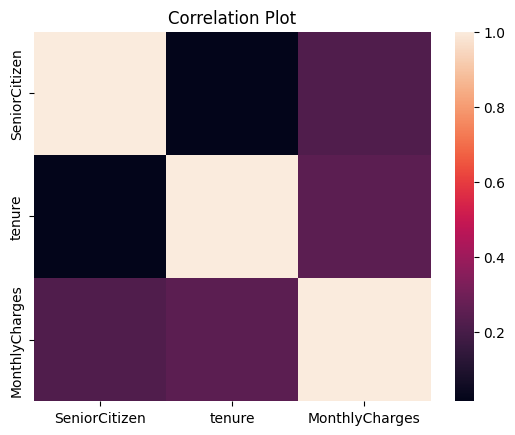

In [ ]:
sns.heatmap(customer.corr())
plt.title('Correlation Plot')
plt.show

In [ ]:
#The features in our dataset
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#How much data we have
customer.shape

(7043, 21)

In [ ]:
#Our data types
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Checking to see if theres missing values
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#How does the contract vary?
customer.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
#How does the payment method vary?
customer.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
customer.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
customer.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
customer.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
customer.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
customer.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
customer.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
customer.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
customer.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [ ]:
customer.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

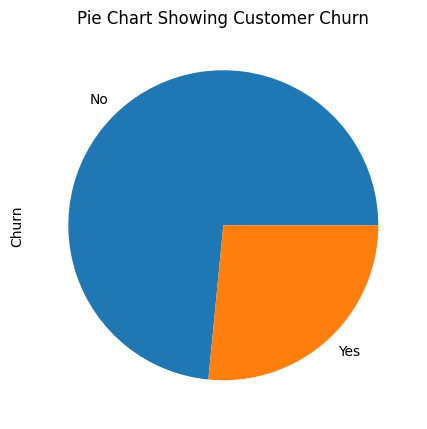

In [ ]:
#Visualize the distribution of the Churn
data = customer.Churn.value_counts()
plt.figure(figsize=(5,10))
data.plot.pie(title='Pie Chart Showing Customer Churn')
plt.show()

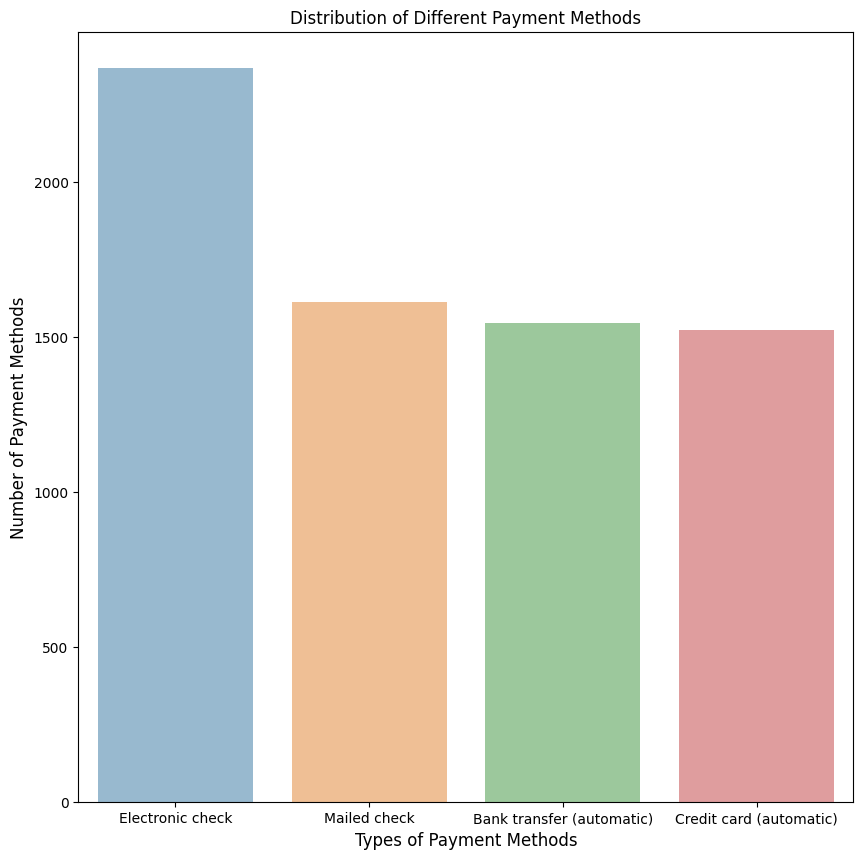

In [ ]:
#Visualize the monthly charges
PaymentMethod_count = customer.PaymentMethod.value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x= PaymentMethod_count.index, y = PaymentMethod_count.values, alpha=0.5)
plt.title('Distribution of Different Payment Methods')
plt.ylabel('Number of Payment Methods', fontsize = 12)
plt.xlabel('Types of Payment Methods', fontsize = 12)
plt.show()


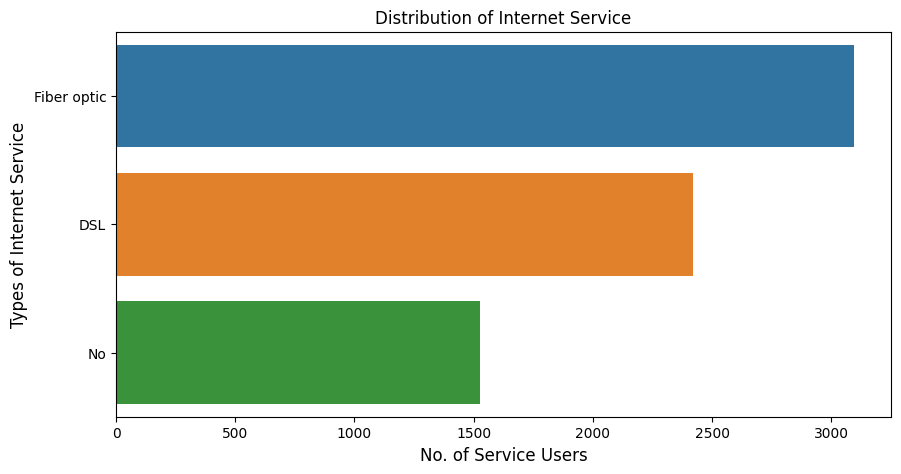

In [ ]:
internetservice_count = customer.InternetService.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = internetservice_count.values, y = internetservice_count.index, alpha=1, orient='h')
plt.title('Distribution of Internet Service')
plt.ylabel('Types of Internet Service', fontsize=12)
plt.xlabel('No. of Service Users', fontsize=12)
plt.show()

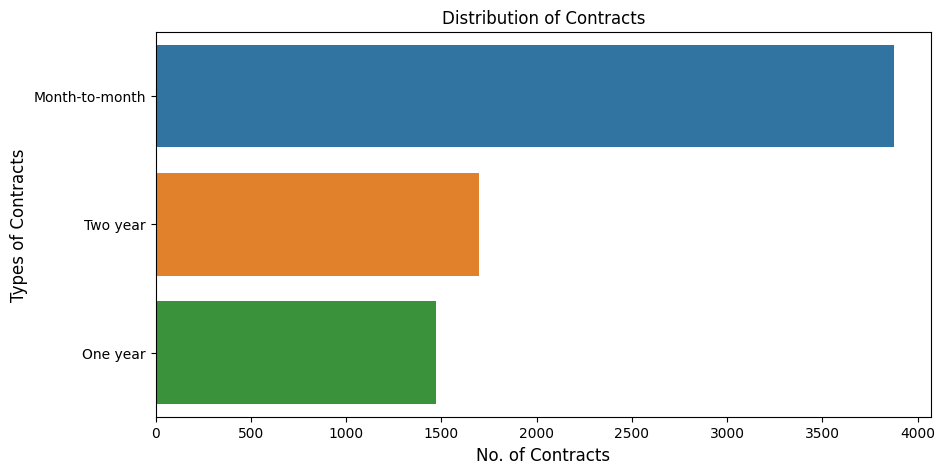

In [ ]:
contract_count = customer.Contract.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = contract_count.values, y = contract_count.index, alpha=1, orient='h')
plt.title('Distribution of Contracts')
plt.ylabel('Types of Contracts', fontsize=12)
plt.xlabel('No. of Contracts', fontsize=12)
plt.show()

Payment Methods

In [ ]:
paymentmethod_encoding = pd.get_dummies(customer['PaymentMethod'])

In [ ]:
paymentmethod_encoding

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [ ]:
customer = customer.drop('PaymentMethod', axis=1)

In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.6,Yes


In [ ]:
customer = customer.join(paymentmethod_encoding)

In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,56.95,1889.5,No,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,42.30,1840.75,No,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,84.80,1990.5,No,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,103.20,7362.9,No,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,29.60,346.45,No,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,74.40,306.6,Yes,0,0,0,1


In [ ]:
internetservice_encoding = pd.get_dummies(customer['InternetService'], drop_first=True)

In [ ]:
customer = customer.drop('InternetService', axis=1)

In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,One year,No,56.95,1889.5,No,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,One year,No,42.30,1840.75,No,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,One year,Yes,84.80,1990.5,No,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,One year,Yes,103.20,7362.9,No,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,No,Month-to-month,Yes,29.60,346.45,No,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,No,Month-to-month,Yes,74.40,306.6,Yes,0,0,0,1


In [ ]:
customer = customer.join(internetservice_encoding)
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Yes,29.85,29.85,No,0,0,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,56.95,1889.5,No,0,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Yes,53.85,108.15,Yes,0,0,0,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,42.30,1840.75,No,1,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,Yes,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,84.80,1990.5,No,0,0,0,1,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,103.20,7362.9,No,0,1,0,0,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,Yes,29.60,346.45,No,0,0,1,0,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,Yes,74.40,306.6,Yes,0,0,0,1,1,0


In [ ]:
churn_encoding = pd.get_dummies(customer['Churn'], drop_first=True)

In [ ]:
customer = customer.drop('Churn', axis=1)

In [ ]:
customer = customer.join(churn_encoding)
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
partner_encoding = pd.get_dummies(customer['Partner'], drop_first=True)
customer = customer.drop('Partner', axis=1)
customer

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,No,1,No,No phone service,No,Yes,No,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,No,34,Yes,No,Yes,No,Yes,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,Yes,No,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,No,45,No,No phone service,Yes,No,Yes,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,24,Yes,Yes,Yes,No,Yes,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,Yes,72,Yes,Yes,No,Yes,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,11,No,No phone service,Yes,No,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,No,4,Yes,Yes,No,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
dependents_encoding = pd.get_dummies(customer['Dependents'], drop_first=True)
customer = customer.drop('Dependents', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No,No phone service,No,Yes,No,No,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,Yes,No,Yes,No,Yes,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,Yes,No,Yes,Yes,No,No,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No,No phone service,Yes,No,Yes,Yes,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,Yes,No,No,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,Yes,No,Yes,Yes,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,Yes,No,Yes,Yes,No,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No,No phone service,Yes,No,No,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,Yes,No,No,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
PhoneService_encoding = pd.get_dummies(customer['PhoneService'], drop_first=True)
customer = customer.drop('PhoneService', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,No,Yes,No,No,No,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,Yes,No,Yes,No,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,Yes,Yes,No,No,No,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,Yes,No,Yes,Yes,No,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,No,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,No,Yes,Yes,Yes,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,No,Yes,Yes,No,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,Yes,No,No,No,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,No,No,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
OnlineSecurity_encoding = pd.get_dummies(customer['OnlineSecurity'], drop_first=True)
customer = customer.drop('OnlineSecurity', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,Yes,No,No,No,No,...,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,No,Yes,No,No,No,...,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,Yes,No,No,No,No,...,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,No,Yes,Yes,No,No,...,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,No,No,No,No,...,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,No,Yes,Yes,Yes,Yes,...,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,Yes,Yes,No,Yes,Yes,...,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,No,No,No,No,No,...,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,No,No,No,No,...,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
OnlineBackup_encoding = pd.get_dummies(customer['OnlineBackup'], drop_first=True)
customer = customer.drop('OnlineBackup', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,No,No,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,Yes,No,No,No,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,No,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,Yes,Yes,No,No,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,No,No,No,No,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,No,No,No,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
DeviceProtection_encoding = pd.get_dummies(customer['DeviceProtection'], drop_first=True)
customer = customer.drop('DeviceProtection', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,No,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,No,No,No,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,Yes,No,No,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,No,No,No,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,No,No,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
TechSupport_encoding = pd.get_dummies(customer['TechSupport'], drop_first=True)
customer = customer.drop('TechSupport', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,No,No,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,No,No,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,Yes,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,Yes,Yes,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,No,No,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,No,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
StreamingTV_encoding = pd.get_dummies(customer['StreamingTV'], drop_first=True)
customer = customer.drop('StreamingTV', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,No,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,No,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,No,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,Yes,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,Yes,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,No,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,No,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
StreamingMovies_encoding = pd.get_dummies(customer['StreamingMovies'], drop_first=True)
customer = customer.drop('StreamingMovies', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MultipleLines,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,No phone service,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,No,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,No,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,No phone service,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,No,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,Yes,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,Yes,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,No phone service,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Yes,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
MultipleLines_encoding = pd.get_dummies(customer['MultipleLines'], drop_first=True)
customer = customer.drop('MultipleLines', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,One year,No,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,Month-to-month,Yes,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,One year,No,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,Month-to-month,Yes,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,One year,Yes,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,One year,Yes,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,Month-to-month,Yes,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Month-to-month,Yes,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
PaperlessBilling_encoding = pd.get_dummies(customer['PaperlessBilling'], drop_first=True)
customer = customer.drop('PaperlessBilling', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,Month-to-month,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,One year,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,Month-to-month,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,One year,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,Month-to-month,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,One year,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,One year,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,Month-to-month,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,Month-to-month,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
Contract_encoding = pd.get_dummies(customer['Contract'], drop_first=True)
customer = customer.drop('Contract', axis=1)
customer

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,1,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,34,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,2,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,45,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,2,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,72,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,11,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,4,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
tenure_encoding = pd.get_dummies(customer['tenure'], drop_first=True)
customer = customer.drop('tenure', axis=1)
customer

,customerID,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,Female,0,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,Male,0,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,Female,0,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,Female,0,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
gender_encoding = pd.get_dummies(customer['gender'], drop_first=True)
customer = customer.drop('gender', axis=1)
customer

,customerID,SeniorCitizen,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,7590-VHVEG,0,29.85,29.85,0,0,1,0,0,0,0
1,5575-GNVDE,0,56.95,1889.5,0,0,0,1,0,0,0
2,3668-QPYBK,0,53.85,108.15,0,0,0,1,0,0,1
3,7795-CFOCW,0,42.30,1840.75,1,0,0,0,0,0,0
4,9237-HQITU,0,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,84.80,1990.5,0,0,0,1,0,0,0
7039,2234-XADUH,0,103.20,7362.9,0,1,0,0,1,0,0
7040,4801-JZAZL,0,29.60,346.45,0,0,1,0,0,0,0
7041,8361-LTMKD,1,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
customerID_encoding = pd.get_dummies(customer['customerID'], drop_first=True)
customer = customer.drop('customerID', axis=1)
customer

,SeniorCitizen,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,0,29.85,29.85,0,0,1,0,0,0,0
1,0,56.95,1889.5,0,0,0,1,0,0,0
2,0,53.85,108.15,0,0,0,1,0,0,1
3,0,42.30,1840.75,1,0,0,0,0,0,0
4,0,70.70,151.65,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.5,0,0,0,1,0,0,0
7039,0,103.20,7362.9,0,1,0,0,1,0,0
7040,0,29.60,346.45,0,0,1,0,0,0,0
7041,1,74.40,306.6,0,0,0,1,1,0,1


In [ ]:
X = customer.drop(['MonthlyCharges','TotalCharges'], axis=1)
y = customer['SeniorCitizen']

In [ ]:
X

,SeniorCitizen,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Fiber optic,No,Yes
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0
7039,0,0,1,0,0,1,0,0
7040,0,0,0,1,0,0,0,0
7041,1,0,0,0,1,1,0,1


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression

#Load the linear regression model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
coefficents = LR.coef_

In [ ]:
print(f'Coefficients {coefficents}')

Coefficients [ 1.00000000e+00 -2.75154872e-01 -2.75154872e-01 -2.75154872e-01
 -2.75154872e-01  7.49400542e-16  1.52655666e-16  7.77156117e-16]


In [ ]:
intercept = LR.intercept_
print(f'Intercept{intercept}')

Intercept0.2751548716598789


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f'R2:{r2}')

R2:1.0


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 4.1412820417953116e-30


In [ ]:
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(f'RMSE: {rmse}')

RMSE: 2.0350140151348617e-15


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print(f'MAE {mae}')

MAE 1.4786247632507734e-15


In [ ]:
y_pred

array([-8.88178420e-16, -1.83186799e-15, -1.55431223e-15, ...,
        1.00000000e+00, -8.32667268e-16,  1.00000000e+00])

In [ ]:
import pickle
with open('customer_lifetime_value.pk1','wb') as f:
  pickle.dump(LR, f)